In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.dummy import DummyClassifier



In [5]:
minst = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [8]:
x = minst.data
y = minst.target

In [18]:
len(x[0]) # each image is 28 x 28 pixels

784

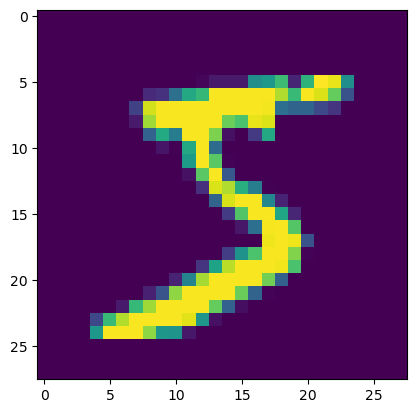

In [17]:
plt.imshow(x[0].reshape(28, -1))
plt.show()

In [19]:
y[0]

'5'

# Binary Classifier

In [20]:
# Let's just identify only one digit ie is 5

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=29)

In [52]:
y_train_5 = (ytrain == '5')
y_test_5 = (ytest == '5')

In [53]:
sgd_clf = SGDClassifier(random_state=29)
sgd_clf.fit(xtrain, y_train_5)

SGDClassifier(random_state=29)

In [54]:
# The input to sgd.predict needs to be a 2D array, so we wrap single_digit in a list ([single_digit]).
sgd_clf.predict([xtest[0]])

array([ True])

In [55]:
ypred = sgd_clf.predict(xtest)

# Performance Measures

In [42]:
score = cross_val_score(sgd_clf, xtrain, y_train_5, cv=5, scoring='accuracy')
score

array([0.96765306, 0.95632653, 0.95979592, 0.95295918, 0.96459184])

In [46]:
dummy_clf = DummyClassifier(random_state=29)
dummy_clf.fit(xtrain, y_train_5)
any(dummy_clf.predict(xtest)) # there is no 5 detected

False

In [45]:
score = cross_val_score(dummy_clf, xtrain, y_train_5, cv=5)
score

array([0.90877551, 0.90877551, 0.90877551, 0.90887755, 0.90887755])

In [57]:
accuracy_score(y_test_5, ypred)

0.9664761904761905

In [58]:
precision_score(y_test_5, ypred)

0.7991609858416361

In [59]:
recall_score(y_test_5, ypred)

0.8260162601626017